In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving color.png to color (1).png


Saving gaussian.png to gaussian (1).png


Saving gray.png to gray.png


Saving median.bmp to median.bmp


Saving sharp.png to sharp.png


#Q1

Q1_Part1

In [30]:

def equalization(image):
  '''
  you can use libraries
  input(s):
    image (ndarray): input image
  output(s):
    image (ndarray): improved image
  '''
  if len(image.shape)==3 :
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h , s , v= hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
    equ_v = cv2.equalizeHist(v)
    hsv_image2 = cv2.merge((h ,s ,equ_v ))
    out_image = cv2.cvtColor(hsv_image2, cv2.COLOR_HSV2BGR)
  else :
    out_image = cv2.equalizeHist(image)

    
  #your code here
  return out_image

Q1_Part2

In [31]:
def ACE(image, gridSize):
  a = gridSize[0]
  b = gridSize[1]
  i = image.shape[0]
  j = image.shape[1]
  concat_img2 =[]
  ht = int(i /a) # تعداد تصاویر گرید در یک ردیف عمودی
  wt = int(j / b) #تعداد تصاویر گرید در یک ردیف افقی 
  merged_img = []
  imlist =[[] for _ in range(ht)]
  #در این قسمت تصویر اصلی را به گرید هایی تقسیم کرده و برش می دهیم 
  tiles = [image[x:x+a,y:y+b] for x in range(0,i,a) for y in range(0,j,b)]
  #در این قسمت برای هر کدام از گرید های به دست امده مقدار اکولایز شده شان را جایگزین می کنیم
  for i in range(0 , len(tiles)):
    tiles[i] =equalization(tiles[i])
   # ضریب در ترکیب عمودیِ سطر های تصاویر ساخته شده به کار می آید ، ضریب در واقع مشخص کنند سطر است 
  zarib = 0 
  for k in range(0 , ht):
    for j in range(zarib * wt , (zarib+1)*wt):
      #در اینجا ابتدا تصاویر تغییر یافته هر سطر یا ردیف از عکس اصلی را به صورت سطری کنار هم ذخیره میکنیم
      imlist[k].append(tiles[j])
      #با اضافه کردن مقدار ضریب ، همین کار را برای سطر بعدی انجام می دهیم
    zarib = zarib +1 
    concat_img = np.hstack(imlist[k])
    #در این قسمت تصاویر افقی ساخته شده را به صورت عمودی با هم ترکیب میکنیم
    merged_img.append(concat_img)
  merge = np.concatenate(merged_img)

  return merge 

Q1_Part3

In [ ]:
def CLAHE(image, gridSize, cropThreshold):
  '''
  you can just use the equalize function of OpenCV for each grid
  input(s):
    image (ndarray): input image
  output(s):
    image (ndarray): improved image
  '''
  #your code here
  return image

288


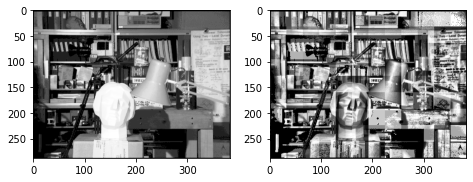

In [36]:
image = cv2.imread('gray.png',0)

fig = plt.figure(figsize=(12, 12))
result_equalization = equalization(image)
fig.add_subplot(1, 3, 1)
plt.imshow(result_equalization , cmap='gray',vmin=0,vmax=255)
print(image.shape[0])
result_ACE = ACE(image, (32,32))
fig.add_subplot(1, 3, 2)
plt.imshow(result_ACE, cmap='gray',vmin=0,vmax=255)
# result_CLAHE = CLAHE(image, (8,8), 2.0)
# fig.add_subplot(1, 3, 3)
# plt.imshow(result_CLAHE)

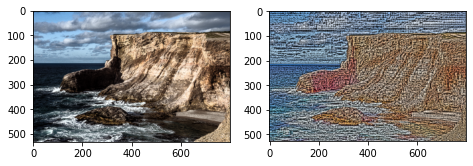

In [ ]:
image = cv2.imread('color.png')
fig = plt.figure(figsize=(12, 12))
result_equalize = equalization(image)
fig.add_subplot(1, 3, 1)
plt.imshow(result_equalize[:,:,::-1])
result_ACE = ACE(image, (8,8))
fig.add_subplot(1, 3, 2)
plt.imshow(result_ACE[:,:,::-1])
# result_CLAHE = CLAHE(image, (8,8), 2.0)
# fig.add_subplot(1, 3, 3)
# plt.imshow(result_CLAHE)

# Q3

Q3_Part1

In [ ]:
def convolve2D(image, kernel):
    # Cross Correlation
		kernel = np.flipud(np.fliplr(kernel))
		strides=1
    # Gather Shapes of Kernel + Image + Padding
		xKernShape = kernel.shape[0]
		yKernShape = kernel.shape[1]
		xImgShape = image.shape[0]
		yImgShape = image.shape[1]
		padding = (yKernShape-1)//2
    # Shape of Output Convolution
		xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
		yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
		output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
		if padding != 0:
				imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
				imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
		else:
				imagePadded = image

    # Iterate through image
		for y in range(image.shape[1]):
        # Exit Convolution
				if y > image.shape[1] - yKernShape:
						break
        # Only Convolve if y has gone down by the specified Strides
				if y % strides == 0:
						for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
								if x > image.shape[0] - xKernShape:
										break
								try:
                    # Only Convolve if x has moved by the specified Strides
										if x % strides == 0:
												output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
								except:
										break


		return output
  

Q3_Part2

In [ ]:
def gausian(m , sigma):
  gausian1 = np.zeros((m ,m ))
  m = m//2
  for x in range(-m , m+1):
    for y in range(-m , m+1):
      x1 = ((2*np.pi)) * (sigma**2)
      x2 = np.exp(-(x**2 + y**2)/(2*(sigma**2)))
      if m%2 != 0:
        gausian1[x+m , y+m] = (1/x1)*x2
      else:
        gausian1[x+m-1 , y+m-1] = (1/x1)*x2

  return gausian1

In [ ]:
print(gausian(3, 0.1))

[[5.92068480e-43 3.06970072e-21 5.92068480e-43]
 [3.06970072e-21 1.59154943e+01 3.06970072e-21]
 [5.92068480e-43 3.06970072e-21 5.92068480e-43]]


Q3_Part3

In [ ]:
def median_filter(image, filter_size):
    temp = []
    indexer = filter_size // 2
    (a,b) = image.shape[:2]
    for i in range(a):
        for j in range(b):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > a - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > b - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(image[i + z - indexer][j + k - indexer])

            temp.sort()
            image[i][j] = temp[len(temp) // 2]
            temp = []
    return image

Q3_Part4

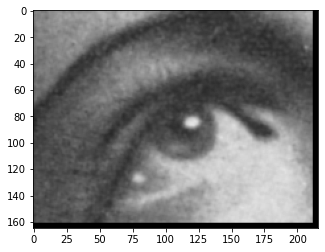

In [ ]:
# load the input image and convert it to grayscale
image = cv2.imread('gaussian.png' )
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = gausian(5 , 1)
OUT = convolve2D(gray , kernel )
plt.imshow(OUT, cmap='gray',vmin=0,vmax=255)



Q3_Part5

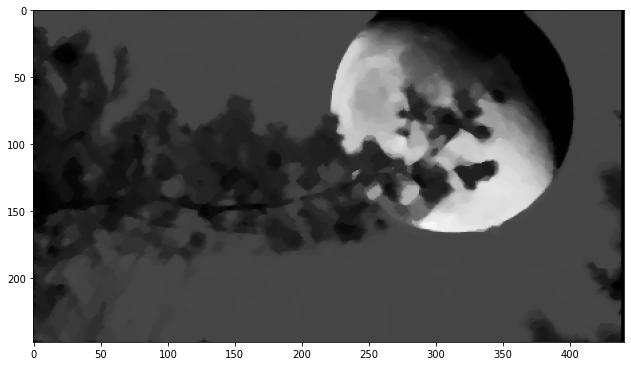

In [32]:
image = cv2.imread('median.bmp', 0)
fig = plt.figure(figsize=(36, 36))
result_equalize = median_filter(image , 5)
fig.add_subplot(1, 3, 1)
plt.imshow(result_equalize, cmap='gray',vmin=0,vmax=255)

Q3_Part6

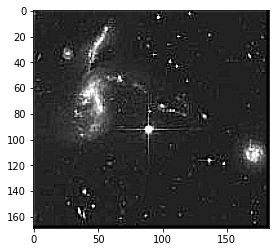

In [33]:
Kernel = [[-1 , -1 , -1 ],
          [-1 , 9 , -1],
          [-1 , -1 , -1 ]]
image = cv2.imread('sharp.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
OUT = convolve2D(gray , Kernel )
plt.imshow(OUT, cmap='gray',vmin=0,vmax=255)
  